Import necessary packages.

In [3]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [4]:
q1, q2, q3, p1, p2, p3, y = symbols('q1 q2 q3 p1 p2 p3 y')

# 5. Solve for optimal consumption analytically (CD utility, 3 goods)

## Setup the optimization program

Our optimization problem is
\begin{align}
    & \max_{q_1,q_2,q_3}\quad u(q_1,q_2,q_3) \\
    \text{s.t.}\quad & p_1 q_1 + p_2 q_2 + p_3 q_3= y
\end{align}

## Setup the utility function

In [6]:
# define alpha as a rational number of 1/2
#alpha = Rational(1,2)
alpha, beta = symbols('alpha beta')


# Note: in sympy syntax: use double star ** for power
u = q1**(alpha) * q2**(beta) * q3**(1-alpha-beta)
# show the defined function
u

## Setup the lagrangian

In [7]:
lam = symbols('lambda')
lagr = u + lam *(y - p1*q1 - p2*q2 - p3*q3)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

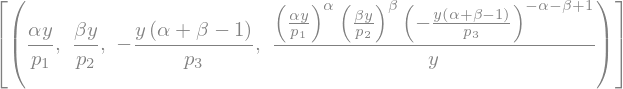

In [10]:
foc_sol = solve(( diff(lagr,q1), diff(lagr,q2), diff(lagr,q3), diff(lagr,lam) ), q1,q2,q3,lam)
foc_sol

The solution is a list with one element, because our solution is unique.

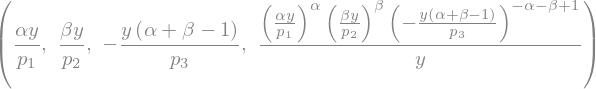

In [11]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

In [12]:
q1star = foc_sol[0][0]
q1star

In [14]:
q2star = foc_sol[0][1]
q2star

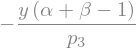

In [15]:
q3star = foc_sol[0][2]
q3star

Substitute optimal consumption into the direct utility function, to calculate the optimal utility level attainable at the given exogenous variables. 

The resulting function is our **indirect utility function**, $v(p_1,p_2,y)$.

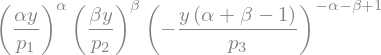

In [16]:
v = u.subs([(q1,q1star), (q2,q2star), (q3,q3star)])
v